In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, linregress

In [92]:
# Load the spreadsheet
file_path = "C:\\Users\\gulsa\\Downloads\\VCTE vs MRE FAST MRI April 9.xlsx"
sheet_name = "Sheet1"
# Read the data
df = pd.read_excel(file_path,sheet_name)

In [93]:
df.columns

Index(['Gender', 'Age', 'Etiology Categories', 'Race/Ethnicity Categories',
       'BMI', 'Waist Circumference', 'Hip Circumference', 'Fibroscan date',
       'CAP Mean', 'CAP category', 'CAP SD', 'E Median', 'E IQR', 'E IQR/Med',
       'Probe Type', 'MR date', 'MRI-PDFF (%)', 'PDFF-category',
       '2D MRE - LS (kPa)', 'Magnetic Field Strength', 'Vendor/Manufacturer',
       'MRE Sequence Type', '3D MRE - LS (kPa)', 'Liver Volume',
       'Spleen Volume', 'Spleen craniocaudal diameter', 'Labs Date',
       'Hematocrit', 'Platelets', 'Creatinine', 'Cholesterol', 'Sodium', 'ALT',
       'AST', 'ALP', 'GGT', 'INR', 'Total Bilirubin', 'Bilirubin Categories',
       'Albumin', 'Albumin Categories', 'Prothrombin Time',
       'Prothrombin (INR based)Categories', 'Encephalopathy',
       'Encephalopathy Cat', 'Ascites', 'Ascites Categories', 'CP-Score',
       'Initial Child-Pugh Class', 'Impression', 'Fib4', 'MELD-Original',
       'MELD-Na', 'MELD 3.0', 'MELD 3.0-Na', 'Bleeding Varices',

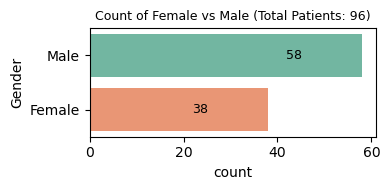

In [94]:
# Count total patients
total_patients = len(df['Gender'])

# Plot histogram for Gender column with counts inside bars
plt.figure(figsize=(4, 2))
g = sns.countplot(y=df['Gender'], palette='Set2')

# Add counts on bars
for bar in g.patches:
    g.annotate(format(bar.get_width(), '.0f'), 
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', size=9, color='black', xytext=(-55, 0),
                textcoords='offset points')

# Add total patient count to the title
plt.title(f'Count of Female vs Male (Total Patients: {total_patients})', size=9)
plt.tight_layout()
plt.savefig(r'C:\Users\gulsa\Downloads\gender_distribution.jpeg', format='jpeg')
plt.show()

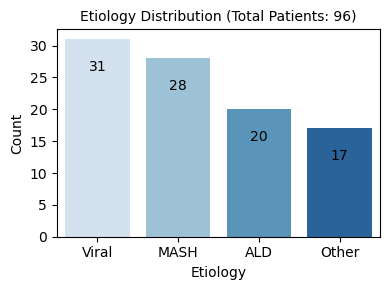

In [95]:
# Count categories and available data for Etiology and Race/Ethnicity
etiology_counts = df['Etiology Categories'].value_counts(dropna=False)
race_counts = df['Race/Ethnicity Categories'].value_counts(dropna=False)

# Plot histogram for Etiology
plt.figure(figsize=(4,3))
sns.barplot(x=etiology_counts.index, y=etiology_counts.values, palette='Blues')
plt.title(f'Etiology Distribution (Total Patients: {len(df)})', size=10)
plt.xlabel('Etiology')
plt.ylabel('Count')
for i, v in enumerate(etiology_counts.values):
    plt.text(i, v - 5, str(v), ha='center')
plt.tight_layout()
plt.savefig(r'C:\Users\gulsa\Downloads\etiology_distribution.jpeg', format='jpeg')
plt.show()

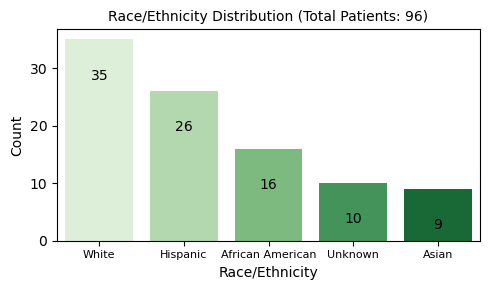

In [96]:
# Plot histogram for Race/Ethnicity
custom_labels = ['White', 'Hispanic', 'African American', 'Unknown', 'Asian']
plt.figure(figsize=(5, 3))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='Greens')
plt.title(f'Race/Ethnicity Distribution (Total Patients: {len(df)})',size=10)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels,size=8)
for i, v in enumerate(race_counts.values):
    plt.text(i, v - 7, str(v), ha='center')
plt.tight_layout()
plt.savefig(r'C:\Users\gulsa\Downloads\race_distribution.jpeg', format='jpeg')
plt.show()

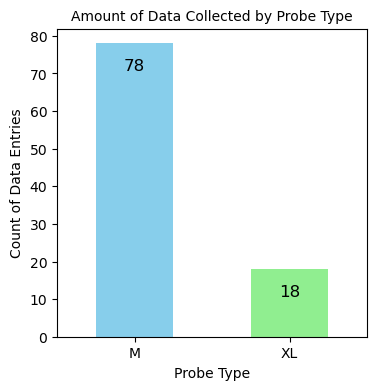

In [97]:
# Group by 'Probe Type' and count the amount of data collected for each type
probe_type_counts = df['Probe Type'].value_counts()
plt.figure(figsize=(4, 4))
ax = probe_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
# Adding counts inside the bars
for i, count in enumerate(probe_type_counts):
    ax.text(i, count - 8, str(count), ha='center', va='bottom', fontsize=12)
plt.title('Amount of Data Collected by Probe Type',size=10)
plt.xlabel('Probe Type')
plt.ylabel('Count of Data Entries')
plt.xticks(rotation=0)
plt.savefig(r"C:\Users\gulsa\Downloads\probe_type.jpg", format='jpeg')
plt.show()

In [98]:
#Remove rows where 'E IQR/Med' is above 30
df_filtered = df[df['E IQR/Med'] <= 30]
#Count the number of rows where 'E IQR/Med' is above 30
count_e_iqr_med_above_30 = len(df[df['E IQR/Med'] > 30])
#Count the total number of available measurements for CAP and E separately
count_cap_mean = df['CAP Mean'].count()  # Number of valid CAP Mean measurements
count_e_median = df_filtered['E Median'].count()  # Number of valid E Median measurements

# Print the counts
print(f"Count of E IQR/Med > 30: {count_e_iqr_med_above_30}")
print(f"Number of valid CAP Mean measurements: {count_cap_mean}")
print(f"Number of valid E Median measurements: {count_e_median}")

Count of E IQR/Med > 30: 11
Number of valid CAP Mean measurements: 92
Number of valid E Median measurements: 85


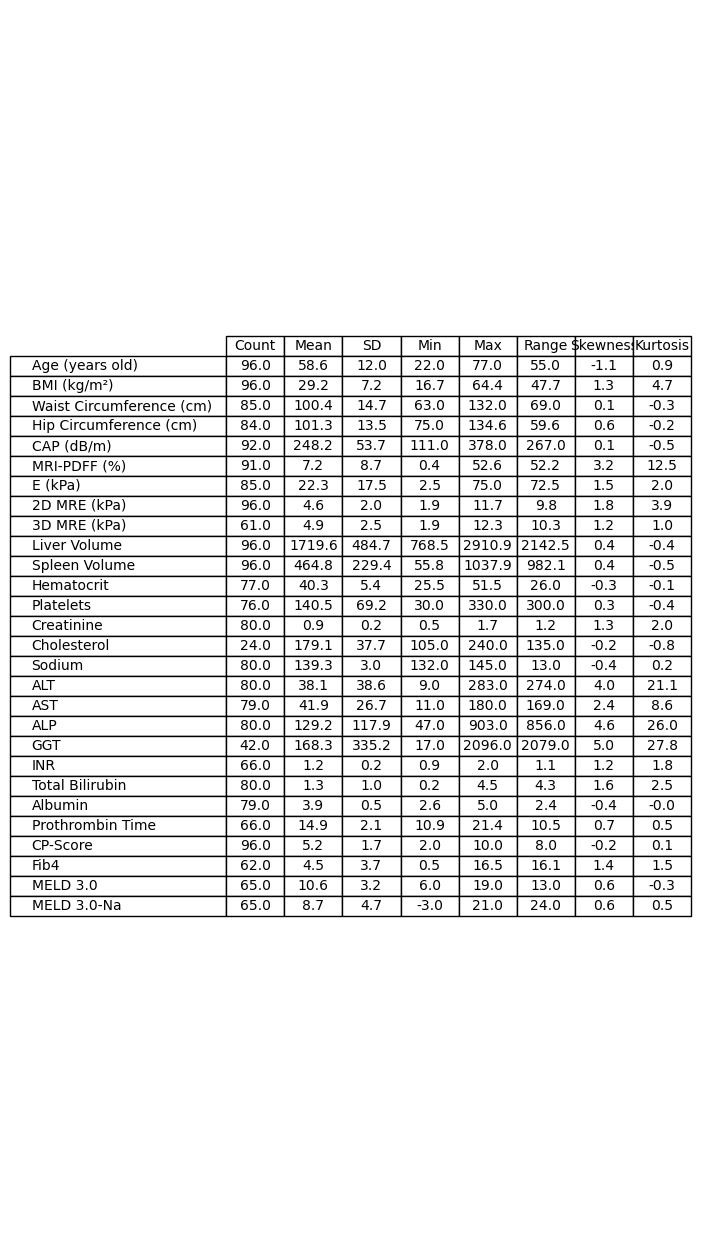

In [99]:

def get_stats(series):
    return [
        int(series.count()),
        round(series.mean(), 1),
        round(series.std(), 1),
        round(series.min(), 1),
        round(series.max(), 1),
        round(series.max() - series.min(), 1),
        round(series.skew(), 1),
        round(series.kurtosis(), 1)
    ]

# Compile all statistics
stats_df = pd.DataFrame(
    [
        get_stats(df['Age']), get_stats(df['BMI']), get_stats(df['Waist Circumference']), get_stats(df['Hip Circumference']),
        #elastography
        get_stats(df['CAP Mean']), get_stats(df['MRI-PDFF (%)']), get_stats(df_filtered['E Median']),
        get_stats(df['2D MRE - LS (kPa)']), get_stats(df['3D MRE - LS (kPa)']),
        get_stats(df['Liver Volume']), get_stats(df['Spleen Volume']),
        #blood tests      
        get_stats(df['Hematocrit']), get_stats(df['Platelets']), get_stats(df['Creatinine']),
        get_stats(df['Cholesterol']), get_stats(df['Sodium']),
        #Liver function tests        
        get_stats(df['ALT']), get_stats(df['AST']), get_stats(df['ALP']), get_stats(df['GGT']), get_stats(df['INR']),
        #contributors for child pugh score
        get_stats(df['Total Bilirubin']), get_stats(df['Albumin']), get_stats(df['Prothrombin Time']), get_stats(df['CP-Score']),

        get_stats(df['Fib4']), get_stats(df['MELD 3.0']), get_stats(df['MELD 3.0-Na']),
    ],
    index=[
        'Age (years old)', 'BMI (kg/m²)', 'Waist Circumference (cm)', 'Hip Circumference (cm)',
        'CAP (dB/m)', 'MRI-PDFF (%)', 'E (kPa)','2D MRE (kPa)', '3D MRE (kPa)',
        'Liver Volume','Spleen Volume',
        'Hematocrit', 'Platelets', 'Creatinine', 'Cholesterol', 'Sodium',
        'ALT', 'AST', 'ALP', 'GGT', 'INR',
        'Total Bilirubin', 'Albumin', 'Prothrombin Time', 'CP-Score', 
        'Fib4', 'MELD 3.0', 'MELD 3.0-Na'
    ],
    columns=[
        'Count','Mean', 'SD', 'Min', 'Max', 'Range', 'Skewness', 'Kurtosis'
    ]
)

fig, ax = plt.subplots(figsize=(5, 2 + 0.5 * len(stats_df)))  # Adjust height based on number of rows
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=stats_df.values,
    colLabels=stats_df.columns,
    rowLabels=stats_df.index,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust cell size

# Save the table as a JPEG
plt.savefig(r"C:\Users\gulsa\Downloads\stats.jpg", format='jpeg', bbox_inches='tight')
plt.show()

C:\Users\gulsa\AppData\Local\Temp\ipykernel_1556\2634839629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['E Median'] = pd.to_numeric(df_filtered['E Median'], errors='coerce')


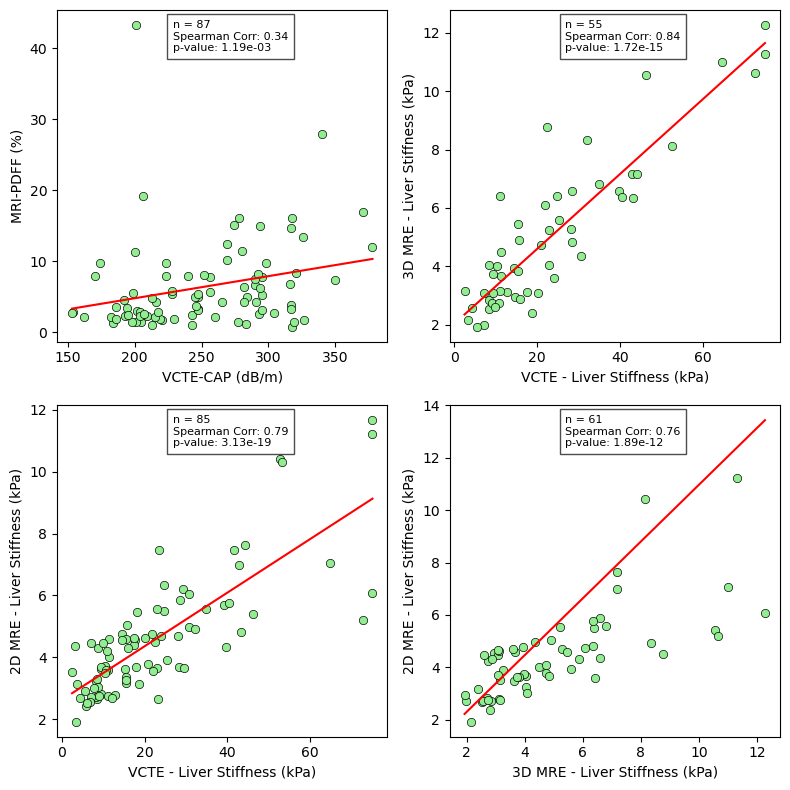

In [100]:
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")

#Remove rows where any of the specified columns have non-numerical values
df['CAP Mean'] = pd.to_numeric(df['CAP Mean'], errors='coerce')
df['MRI-PDFF (%)'] = pd.to_numeric(df['MRI-PDFF (%)'], errors='coerce')
df_filtered['E Median'] = pd.to_numeric(df_filtered['E Median'], errors='coerce')
df['2D MRE - LS (kPa)'] = pd.to_numeric(df['2D MRE - LS (kPa)'], errors='coerce')
df['3D MRE - LS (kPa)'] = pd.to_numeric(df['3D MRE - LS (kPa)'], errors='coerce')

# Filter rows where both CAP Mean and MRI-PDFF (%) are present, and both E Median and 2D MRE - LS (kPa) are present
df_filtered_cap_pdff = df.dropna(subset=['CAP Mean', 'MRI-PDFF (%)'])
df_filtered_e_2dmre = df_filtered.dropna(subset=['E Median', '2D MRE - LS (kPa)'])
df_filtered_e_3dmre = df_filtered.dropna(subset=['E Median', '3D MRE - LS (kPa)'])
df_filtered_2dmre_3dmre = df.dropna(subset=['2D MRE - LS (kPa)', '3D MRE - LS (kPa)'])

# Calculate the Spearman correlation for CAP Mean vs MRI-PDFF (%)
spearman_corr_cap_pdff, p_value_cap_pdff = spearmanr(df_filtered_cap_pdff['CAP Mean'], df_filtered_cap_pdff['MRI-PDFF (%)'])

# Step 5: Calculate the Spearman correlation for E Median vs 2D MRE - LS (kPa)
spearman_corr_e_2dmre, p_value_e_2dmre = spearmanr(df_filtered_e_2dmre['E Median'], df_filtered_e_2dmre['2D MRE - LS (kPa)'])
spearman_corr_e_3dmre, p_value_e_3dmre = spearmanr(df_filtered_e_3dmre['E Median'], df_filtered_e_3dmre['3D MRE - LS (kPa)'])
spearman_corr_2dmre_3dmre, p_value_2dmre_3dmre = spearmanr(df_filtered_2dmre_3dmre['2D MRE - LS (kPa)'], df_filtered_2dmre_3dmre['3D MRE - LS (kPa)'])

# Step 6: Linear regression for both pairs for fit line
slope_cap_pdff, intercept_cap_pdff, r_value_cap_pdff, _, _ = linregress(df_filtered_cap_pdff['CAP Mean'], df_filtered_cap_pdff['MRI-PDFF (%)'])
slope_e_2dmre, intercept_e_2dmre, r_value_e_2dmre, _, _ = linregress(df_filtered_e_2dmre['E Median'], df_filtered_e_2dmre['2D MRE - LS (kPa)'])
slope_e_3dmre, intercept_e_3dmre, r_value_e_3dmre, _, _ = linregress(df_filtered_e_3dmre['E Median'], df_filtered_e_3dmre['3D MRE - LS (kPa)'])
slope_2dmre_3dmre, intercept_2dmre_3dmre, r_value_2dmre_3dmre, _, _ = linregress(df_filtered_2dmre_3dmre['2D MRE - LS (kPa)'], df_filtered_2dmre_3dmre['3D MRE - LS (kPa)'])

# Step 7: Plot the scatter plots with fit lines and correlation results
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot for CAP Mean vs MRI-PDFF (%)
sns.scatterplot(x=df_filtered_cap_pdff['CAP Mean'], y=df_filtered_cap_pdff['MRI-PDFF (%)'], ax=axs[0,0], color='lightgreen', edgecolor='black')
sns.lineplot(x=df_filtered_cap_pdff['CAP Mean'], y=slope_cap_pdff * df_filtered_cap_pdff['CAP Mean'] + intercept_cap_pdff, ax=axs[0,0], color='red')
# axs[0,0].set_title(f"VCTE-CAP vs MRI-PDFF (%)",size=9)
axs[0,0].set_xlabel('VCTE-CAP (dB/m)')
axs[0,0].set_ylabel('MRI-PDFF (%)')

# Add text box with correlation and data points count
n_cap_pdff = len(df_filtered_cap_pdff)
axs[0,0].text(0.35, 0.97, f'n = {n_cap_pdff}\nSpearman Corr: {spearman_corr_cap_pdff:.2f}\np-value: {p_value_cap_pdff:.2e}', 
            transform=axs[0,0].transAxes, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Plot for E Median vs 2D MRE - LS (kPa)
sns.scatterplot(x=df_filtered_e_2dmre['E Median'], y=df_filtered_e_2dmre['2D MRE - LS (kPa)'], ax=axs[1,0], color='lightgreen', edgecolor='black')
sns.lineplot(x=df_filtered_e_2dmre['E Median'], y=slope_e_2dmre * df_filtered_e_2dmre['E Median'] + intercept_e_2dmre, ax=axs[1,0], color='red')
# axs[1,0].set_title(f"VCTE-E vs 2D MRE (kPa)",size=9)
axs[1,0].set_xlabel('VCTE - Liver Stiffness (kPa)')
axs[1,0].set_ylabel('2D MRE - Liver Stiffness (kPa)')

# Add text box with correlation and data points count
n_e_2dmre = len(df_filtered_e_2dmre)
axs[1,0].text(0.35, 0.97, f'n = {n_e_2dmre}\nSpearman Corr: {spearman_corr_e_2dmre:.2f}\np-value: {p_value_e_2dmre:.2e}', 
            transform=axs[1,0].transAxes, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Plot for E Median vs 3D MRE - LS (kPa)
sns.scatterplot(x=df_filtered_e_3dmre['E Median'], y=df_filtered_e_3dmre['3D MRE - LS (kPa)'], ax=axs[0,1], color='lightgreen', edgecolor='black')
sns.lineplot(x=df_filtered_e_3dmre['E Median'], y=slope_e_3dmre * df_filtered_e_3dmre['E Median'] + intercept_e_3dmre, ax=axs[0,1], color='red')
# axs[0,1].set_title(f"VCTE-E vs 3D MRE",size=9)
axs[0,1].set_xlabel('VCTE - Liver Stiffness (kPa)')
axs[0,1].set_ylabel('3D MRE - Liver Stiffness (kPa)')

# Add text box with correlation and data points count
n_e_3dmre = len(df_filtered_e_3dmre)
axs[0,1].text(0.35, 0.97, f'n = {n_e_3dmre}\nSpearman Corr: {spearman_corr_e_3dmre:.2f}\np-value: {p_value_e_3dmre:.2e}', 
            transform=axs[0,1].transAxes, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Plot for 2D MRE vs 3D MRE - LS (kPa)
sns.scatterplot(x=df_filtered_2dmre_3dmre['3D MRE - LS (kPa)'], y=df_filtered_2dmre_3dmre['2D MRE - LS (kPa)'], ax=axs[1,1], color='lightgreen', edgecolor='black')
sns.lineplot(x=df_filtered_2dmre_3dmre['3D MRE - LS (kPa)'], y=slope_2dmre_3dmre * df_filtered_2dmre_3dmre['3D MRE - LS (kPa)'] + intercept_2dmre_3dmre, ax=axs[1,1], color='red')
# axs[1,1].set_title(f"3D vs 2D MRE",size=9)
axs[1,1].set_xlabel('3D MRE - Liver Stiffness (kPa)')
axs[1,1].set_ylabel('2D MRE - Liver Stiffness (kPa)')

# Add text box with correlation and data points count
n_2dmre_3dmre = len(df_filtered_2dmre_3dmre)
axs[1,1].text(0.35, 0.97, f'n = {n_2dmre_3dmre}\nSpearman Corr: {spearman_corr_2dmre_3dmre:.2f}\np-value: {p_value_2dmre_3dmre:.2e}', 
            transform=axs[1,1].transAxes, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.savefig(r"C:\Users\gulsa\Downloads\correlation_plots.jpg", format='jpeg', bbox_inches='tight')
plt.show()

### Agreement Analysis

In [101]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

# Define the column sets
all_colsets = {
    "MASLD F0–2 vs F3–4": ["MRE MASLD F0-2 vs F3-4", "VCTE MASLD F0-2 vs F3-4"],
    "MASLD F0–3 vs F4":   ["MRE MASLD F0-3 vs F4",   "VCTE MASLD F0-3 vs F4"],
    "ALD F0–2 vs F3–4":   ["MRE ALD F0-2 vs F3-4",   "VCTE ALD F0-2 vs F3-4"],  
    "ALD F0–3 vs F4":     ["MRE ALD F0-3 vs F4",     "VCTE ALD F0-3 vs F4"]
}

# Iterate through each column pair
for name, cols in all_colsets.items():
    print(f"\n🧪 Analysis for: {name}")

    # Drop rows with missing data
    clean_df = df[cols].dropna().copy()
    clean_df.columns = ['MRE', 'VCTE']

    print(f"Number of patients: {len(clean_df)}")

    if len(clean_df) == 0:
        print("No data available after removing NaNs.")
        continue

    # 1. Cohen's Kappa
    kappa = cohen_kappa_score(clean_df['MRE'], clean_df['VCTE'])
    print(f"Cohen's Kappa: {kappa:.3f}")

    # 2. Confusion Matrix
    cm = confusion_matrix(clean_df['MRE'], clean_df['VCTE'], labels=[0, 1])
    print("Confusion Matrix:")
    print(cm)

    b = cm[0][1]
    c = cm[1][0]

    # 3. McNemar's Test
    table = [[cm[0][0], b],
             [c, cm[1][1]]]

    result = mcnemar(table, exact=False, correction=True)
    print(f"McNemar's test statistic: {result.statistic:.3f}")
    print(f"p-value: {result.pvalue:.3f}")



🧪 Analysis for: MASLD F0–2 vs F3–4
Number of patients: 28
Cohen's Kappa: 0.270
Confusion Matrix:
[[ 2  3]
 [ 3 20]]
McNemar's test statistic: 0.167
p-value: 0.683

🧪 Analysis for: MASLD F0–3 vs F4
Number of patients: 28
Cohen's Kappa: 0.571
Confusion Matrix:
[[ 8  6]
 [ 0 14]]
McNemar's test statistic: 4.167
p-value: 0.041

🧪 Analysis for: ALD F0–2 vs F3–4
Number of patients: 20
Cohen's Kappa: 0.765
Confusion Matrix:
[[ 5  2]
 [ 0 13]]
McNemar's test statistic: 0.500
p-value: 0.480

🧪 Analysis for: ALD F0–3 vs F4
Number of patients: 20
Cohen's Kappa: 0.596
Confusion Matrix:
[[9 2]
 [2 7]]
McNemar's test statistic: 0.250
p-value: 0.617


In [102]:
# Drop rows with NaN values in 'Initial Child-Pugh Class' and 'Decompensation' columns
df_cleaned1 = df.dropna(subset=['Initial Child-Pugh Class'])
distribution_cleaned1 = df_cleaned1.groupby(['Initial Child-Pugh Class']).size().reset_index(name='Count')
print(distribution_cleaned1)

# Load the spreadsheet
file_path = "C:\\Users\\gulsa\\Downloads\\VCTE vs MRE FAST MRI April 9.xlsx"
sheet_name = "Sheet3"
# Read the data
df = pd.read_excel(file_path,sheet_name)
df.head()

df_cleaned2 = df.dropna(subset=['Decompensation'])
distribution_cleaned2 = df_cleaned2.groupby(['Decompensation']).size().reset_index(name='Count')
print(distribution_cleaned2)

  Initial Child-Pugh Class  Count
0                        A     52
1                        B     17
2                        C      1
   Decompensation  Count
0               0     73
1               1     10


### Below code performs a robost feature selection performance evaluation using bootstrapped L1-regularized logistic regression (Lasso: Least Absolute Shrinkage and Selection Operator) on different clinical and imaging feature sets to predict liver decompensation in patients. 

### Lasso (L1 regularization) is specific to models with linear coefficients, like logistic regression or linear regression. Lasso adds an L1 penalty to the loss function, encouraging sparsity by driving some coefficients exactly to zero. Through this it helps in feature selection by identifying the most important predictors.

### Through this:
    -Most robust predictors can be identified.
    -Model performance variability can be evaluated across bootstrapped samples.
    -Feature selection can be guided. Features selected frequently are more stable, meaning they are less likely to be artifacts of data noise.

To identify stable and predictive feature subsets from various clinical modalities (MRI, VCTE, and laboratory biomarkers), we implemented a bootstrapped L1-regularized logistic regression framework. Over 100 bootstrapped iterations, we evaluated both model performance and feature selection consistency. By analyzing the frequency of non-zero coefficients, we identified robust predictors of decompensation. This process not only enhances model reliability by mitigating overfitting risks but also provides data-driven guidance for future feature engineering and modality prioritization in machine learning-based risk prediction models

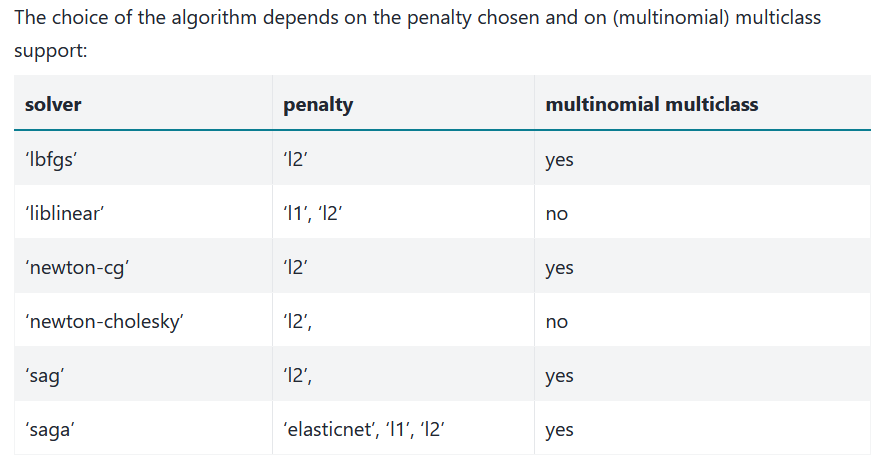

In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
)

# Store results
results = []

# Function to evaluate model performance
def evaluate_model(X, y, model, model_name, feature_set, test_size):
    X = X.dropna()
    y = y[X.index]  # Align y with the new X
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    auc = np.round(roc_auc_score(y_test, y_proba),3)
    acc = np.round(accuracy_score(y_test, y_pred),3)
    prec = np.round(precision_score(y_test, y_pred, zero_division=0),3)
    rec = np.round(recall_score(y_test, y_pred, zero_division=0),3)
    f1 = np.round(f1_score(y_test, y_pred, zero_division=0),3)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Save confusion matrix plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{model_name} - {feature_set} (Test {int(test_size*100)}%)")
    plt.savefig(f"CM plots/{model_name}_{feature_set.replace(' ', '_')}_cm_{int(test_size*100)}.png")
    plt.close()

    
    # Append results
    results.append({
        'Model': model_name,
        'Feature Set': feature_set,
        'Test Size': test_size,
        'AUC': auc,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Set your target
y = df['Decompensation']

# Define test sizes
test_sizes = [0.2, 0.25, 0.30, 0.35, 0.40]

# Define model input combinations
model_inputs = {
    "2D MRE-LS + MRI-PDFF": ['2D MRE - LS (kPa)', 'MRI-PDFF (%)'],
    "2D MRE-LS + CP-Score": ['2D MRE - LS (kPa)', 'CP-Score'],
    "2D MRE-LS + Fib-4": ['2D MRE - LS (kPa)', 'Fib4'],
    "2D MRE-LS + MELD 3.0-Na": ['2D MRE - LS (kPa)', 'MELD 3.0-Na'],
    "2D MRE-LS + MELD 3.0": ['2D MRE - LS (kPa)', 'MELD 3.0'],
    "VCTE-LS + VCTE-CAP": ['E Median', 'CAP Mean'],
    "VCTE-LS + CP-Score": ['E Median', 'CP-Score'],
    "VCTE-LS + Fib-4": ['E Median', 'Fib4'],
    "VCTE-LS + MELD 3.0-Na": ['E Median', 'MELD 3.0-Na'],
    "VCTE-LS + MELD 3.0": ['E Median', 'MELD 3.0']
}

# Loop through test sizes and model inputs
for test_size in test_sizes:
    for name, features in model_inputs.items():
        X = df[features]

        # Logistic Regression
        lr_model = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced', max_iter=10000)
        evaluate_model(X, y, lr_model, "Logistic Regression", name, test_size)

        # # XGBoost
        # xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=True)
        # evaluate_model(X, y, xgb_model, "XGBoost", name, test_size)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print the full table
print("\n=== Evaluation Results Table ===")
print(results_df.to_string(index=False))

#results_df.to_csv("model_evaluation_results.csv", index=False)
results_df.to_excel("evaluation_results_nested.xlsx")

C:\Users\gulsa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gulsa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gulsa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gulsa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gulsa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gulsa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 


=== Evaluation Results Table ===
              Model             Feature Set  Test Size   AUC  Accuracy  Precision  Recall  F1 Score
Logistic Regression    2D MRE-LS + MRI-PDFF       0.20 0.571     0.562      0.143   0.500     0.222
Logistic Regression    2D MRE-LS + CP-Score       0.20 0.600     0.647      0.250   1.000     0.400
Logistic Regression       2D MRE-LS + Fib-4       0.20 0.611     0.636      0.000   0.000     0.000
Logistic Regression 2D MRE-LS + MELD 3.0-Na       0.20 0.727     0.667      0.200   1.000     0.333
Logistic Regression    2D MRE-LS + MELD 3.0       0.20 0.727     0.750      0.250   1.000     0.400
Logistic Regression      VCTE-LS + VCTE-CAP       0.20 0.714     0.562      0.222   1.000     0.364
Logistic Regression      VCTE-LS + CP-Score       0.20 0.567     0.471      0.111   0.500     0.182
Logistic Regression         VCTE-LS + Fib-4       0.20 0.333     0.727      0.000   0.000     0.000
Logistic Regression   VCTE-LS + MELD 3.0-Na       0.20 0.455     0

In [126]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load data
file_path = "C:\\Users\\gulsa\\Downloads\\VCTE vs MRE FAST MRI April 9.xlsx"
sheet_name = "Sheet3"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Define feature groups
model_configs = {
    "2D MRE-LS + MRI-PDFF": ['2D MRE - LS (kPa)', 'MRI-PDFF (%)'],
    "2D MRE-LS + CP-Score": ['2D MRE - LS (kPa)', 'CP-Score'],
    "2D MRE-LS + Fib-4": ['2D MRE - LS (kPa)', 'Fib4'],
    "2D MRE-LS + MELD 3.0-Na": ['2D MRE - LS (kPa)', 'MELD 3.0-Na'],
    "2D MRE-LS + MELD 3.0": ['2D MRE - LS (kPa)', 'MELD 3.0'],
    "VCTE-LS + VCTE-CAP": ['E Median', 'CAP Mean'],
    "VCTE-LS + CP-Score": ['E Median', 'CP-Score'],
    "VCTE-LS + Fib-4": ['E Median', 'Fib4'],
    "VCTE-LS + MELD 3.0-Na": ['E Median', 'MELD 3.0-Na'],
    "VCTE-LS + MELD 3.0": ['E Median', 'MELD 3.0']
}

target_col = 'Decompensation'
n_bootstraps = 100
random_state = 42
test_sizes = [0.2, 0.25, 0.3, 0.35, 0.4]

# Store results across test sizes
results_summary = []

# Loop through each test size
for test_size in test_sizes:
    print(f"\n============== Test Size = {test_size} ==============")

    for model_name, feature_cols in model_configs.items():
        print(f"\n--- Bootstrapping for: {model_name} ---")

        # Prepare data
        X = df[feature_cols]
        y = df[target_col]
        data = pd.concat([X, y], axis=1).dropna()
        X = data[feature_cols]
        y = data[target_col]

        # Standardize
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Metric lists
        auc_scores, acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], [], []
        all_coefs = []

        for i in range(n_bootstraps):
            X_resampled, y_resampled = resample(X_scaled, y, replace=True, stratify=y, random_state=random_state + i)
            X_train, X_test, y_train, y_test = train_test_split(
                X_resampled, y_resampled,
                test_size=test_size,
                stratify=y_resampled,
                random_state=random_state + i
            )

            model = LogisticRegressionCV(
                Cs=10,
                cv=2,
                penalty='l1',
                solver='saga',
                max_iter=10000,
                scoring='roc_auc',
                random_state=random_state
            )
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]

            auc_scores.append(roc_auc_score(y_test, y_prob))
            acc_scores.append(accuracy_score(y_test, y_pred))
            prec_scores.append(precision_score(y_test, y_pred, zero_division=0))
            rec_scores.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

            all_coefs.append(model.coef_[0])

        coef_df = pd.DataFrame(all_coefs, columns=feature_cols)
        selection_freq = (coef_df != 0).sum() / n_bootstraps

       # Store result row
        results_summary.append({
            "Test Size": test_size,
            "Model": model_name,
            "AUC Mean": np.round(np.mean(auc_scores),3),
            "AUC Std": np.round(np.std(auc_scores),3),
            "Accuracy Mean": np.round(np.mean(acc_scores),3),
            "Accuracy Std": np.round(np.std(acc_scores),3),
            "Precision Mean": np.round(np.mean(prec_scores),3),
            "Precision Std": np.round(np.std(prec_scores),3),
            "Recall Mean": np.round(np.mean(rec_scores),3),
            "Recall Std": np.round(np.std(rec_scores),3),
            "F1 Mean": np.round(np.mean(f1_scores),3),
            "F1 Std": np.round(np.std(f1_scores),3),
            **{f"Stability: {col}": freq for col, freq in selection_freq.items()}
        })

results_df = pd.DataFrame(results_summary)
# Save results to Excel
output_path = "C:\\Users\\gulsa\\Downloads\\model_bootstrap_results.xlsx"
results_df.to_excel(output_path, index=False)

print(f"\nResults saved to: {output_path}")



============== Test Size = 0.2 ==============

--- Bootstrapping for: 2D MRE-LS + MRI-PDFF ---

--- Bootstrapping for: 2D MRE-LS + CP-Score ---

--- Bootstrapping for: 2D MRE-LS + Fib-4 ---

--- Bootstrapping for: 2D MRE-LS + MELD 3.0-Na ---

--- Bootstrapping for: 2D MRE-LS + MELD 3.0 ---

--- Bootstrapping for: VCTE-LS + VCTE-CAP ---

--- Bootstrapping for: VCTE-LS + CP-Score ---

--- Bootstrapping for: VCTE-LS + Fib-4 ---

--- Bootstrapping for: VCTE-LS + MELD 3.0-Na ---

--- Bootstrapping for: VCTE-LS + MELD 3.0 ---

============== Test Size = 0.25 ==============

--- Bootstrapping for: 2D MRE-LS + MRI-PDFF ---

--- Bootstrapping for: 2D MRE-LS + CP-Score ---

--- Bootstrapping for: 2D MRE-LS + Fib-4 ---

--- Bootstrapping for: 2D MRE-LS + MELD 3.0-Na ---

--- Bootstrapping for: 2D MRE-LS + MELD 3.0 ---

--- Bootstrapping for: VCTE-LS + VCTE-CAP ---

--- Bootstrapping for: VCTE-LS + CP-Score ---

--- Bootstrapping for: VCTE-LS + Fib-4 ---

--- Bootstrapping for: VCTE-LS + MELD 3.0